In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import json
from scipy.spatial.transform import Rotation as R

In [4]:
with open('./solo/sequence.0/step0.frame_data.json') as json_file:
    data = json.load(json_file)

In [56]:
def extract(l, s):
    for elem in l:
        if elem['id'] == s or elem['id'] == f'{s}_0':
            return elem['values'][0]

captures = data['captures']
obj_1, obj_2 = captures[0], captures[1]
img_1, img_2 = obj_1['filename'], obj_2['filename']
obj_1_3d, bbox_1 = extract(obj_1['annotations'], 'bounding box 3D'), extract(obj_1['annotations'], 'bounding box')
obj_2_3d, bbox_2 = extract(obj_2['annotations'], 'bounding box 3D'), extract(obj_2['annotations'], 'bounding box')

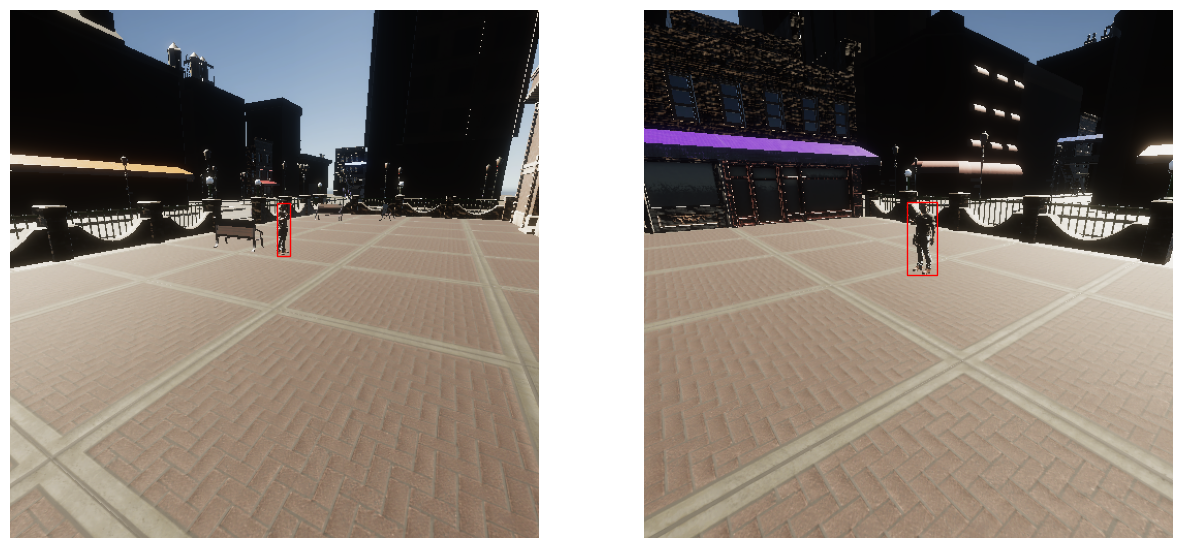

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 30))
ax[0].imshow(mpimg.imread(f'./solo/sequence.0/{img_1}'))
ax[0].add_patch(
    patches.Rectangle(bbox_1['origin'], bbox_1['dimension'][0], bbox_1['dimension'][1], linewidth=1, edgecolor='r', facecolor='none')
)
ax[0].axis('off')

ax[1].imshow(mpimg.imread(f'./solo/sequence.0/{img_2}'))
ax[1].add_patch(
    patches.Rectangle(bbox_2['origin'], bbox_2['dimension'][0], bbox_2['dimension'][1], linewidth=1, edgecolor='r', facecolor='none')
)
ax[1].axis('off')

# plt.axis('off')
plt.show()

In [57]:
obj_1_3d

{'instanceId': 1,
 'labelId': 2,
 'labelName': 'human',
 'translation': [0.369722456, 1.61868429, 10.6676655],
 'size': [0.737789631, 1.84917188, 0.57667625],
 'rotation': [0.0695865452, -0.857597351, 0.120527431, -0.495134056],
 'velocity': [0.0, 0.0, 0.0],
 'acceleration': [0.0, 0.0, 0.0]}

In [58]:
obj_2_3d

{'instanceId': 1,
 'labelId': 2,
 'labelName': 'human',
 'translation': [0.311026841, 0.915563166, 7.554183],
 'size': [0.7377897, 1.84917188, 0.57667625],
 'rotation': [-0.06412003, -0.895216167, 0.136931345, 0.419197559],
 'velocity': [0.0, 0.0, 0.0],
 'acceleration': [0.0, 0.0, 0.0]}

In [65]:
camera = np.array([8.0, 2.5, 3.0])
camera_0 = np.array([-7.0, 2.5, 3.0])

euler = R.from_quat(obj_1_3d['rotation']).as_matrix()
euler_1 = R.from_quat(obj_2_3d['rotation']).as_matrix()

print(np.dot(camera + obj_1_3d['translation'], euler))
print(np.dot(camera_0 + obj_2_3d['translation'], euler_1))

# print(camera + np.matmul(obj_2_3d['translation'])
# print(camera_0 + obj_1_3d['translation'])

[-6.72448107  3.19492658 15.80942946]
[ 7.5662624   2.40448275 10.61925647]


In [55]:
euler_1 = R.from_quat(obj_2_3d['rotation']).as_matrix()
print(euler_1)

[[-6.40324111e-01  3.81987571e-09 -7.68104832e-01]
 [ 2.29605112e-01  9.54276864e-01 -1.91408359e-01]
 [ 7.32984670e-01 -2.98924183e-01 -6.11046485e-01]]
